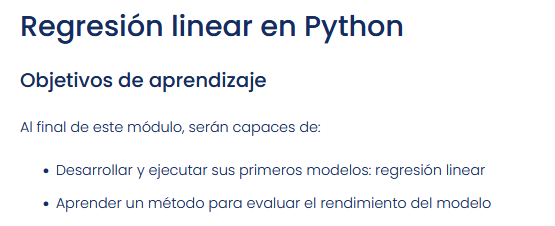

In [1]:
import pandas as pd
from google.colab import drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
filename = "/content/drive/MyDrive/Data CodingDojo/cali_housing.csv"


df = pd.read_csv(filename)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
y = df["MedHouseVal"]

X = df.drop(columns = "MedHouseVal")

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

Todos los valores son numericos, y este modelo no se escalara

# 1. Importar el modelo

In [5]:
from sklearn.linear_model import LinearRegression

#2. Hacer una instancia del modelo

In [6]:
reg = LinearRegression()

#3. Entrenar el modelo en los datos de entrenamiento
Este es el paso donde el modelo aprende sobre la relacion entre las caracteristicas y el objetivo

In [7]:
# El modelo esta aprendiendo la relacion entre X e y.
reg.fit(X_train, y_train)

LinearRegression()

Ahora que el modelo aprendio los patrones, es hora de ver que tan bien puede hacer predicciones.

#**Medicion del rendimiento del modelo**
Nos acostumbraremos a evaluar el rendimiento del modelo tanto en los datos de entrenamiento como en los de prueba. 

Al final, es el rendimiento de los datos de prueba el que indica que tan bien creemos que nuestro modelo funcionara en datos futuros. Sin embargo, veremos como podemos ganar informacion sobre nuestro modelo al comparar su rendimiento en los datos de prueba con su rendimiento en los datos de entrenamiento.

**R^2(coeficiente de determinacion)**

La metrica por defecto para evaluar el modelo de regresion es R^2, el coeficiente de determinacion.

La mejor puntuacion posible para R^2 es 1,0 y **cuanto mas alto sea la R^2, mejor.**

R^2 se da como decimal, pero se suele interpretar como un porcentaje.

Por ejemplo, un R^2 de 0,9 se puede interpretar como: el 90% de la varianza de 'y' se puede explicar por la varianza en X.( el90% de la variacion en nuestro objetivo se puede explicar por las caracteristicas de nuestro modelo).

A continuacion, se muestra el codigo para obtener los datos de R^2 despues de ajustar nuestro modelo.

In [8]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.609873031052925


In [9]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.5910509795491351


El valor de R^2 en nuestro conjunto de entrenamiento es 0,609 y el valor de R^2 en nuestro conjunto de prueba 0,591. En este caso, nuestras puntuaciones de entrenamiento y prueba fueron similares, lo que significa que nuestro modelo no estaba "sobreajustado". 

El sobreajustado - overfitting - ocurre cuando nuestro modelo funciona en nuestros datos de entrenamiento, pero falla en hacer buenas predicciones en los datos de prueba ocultos.

**Obtencion de predicciones**

Veran en la proxima clase que para calcular otras metricas, necesitarn extraer las predicciones del modelo y guardarlas como una variable. Eso se puede hacer usando .predict() como se muestra a continuacion. Pueden hacer esto separado del conjunto de datos de entrenamiento y de prueba.

In [10]:
# obtencion de predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train)

# obtencion de predicciones del conjunto de prueba
test_preds = reg.predict(X_test)

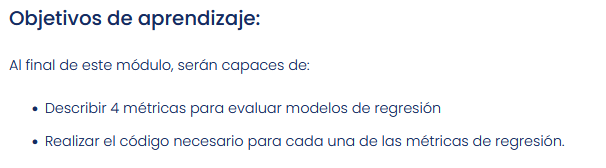

La seccion de regresion linear uso R^2, tambien conocido como coeficiente de determinacion, como metrica para evaluar el rendimiento del modelo de regresion lineal.

tambien existen otras metricas que pueden usar para evaluar el rendimiento de un modelo. 

La tarea es calcular el:

error absoluto medio (EAM),

error cuadratico medio (ECM)

raiz del error cuadratico medio (RECM) 

para el conjunto de datos y el modelo a partir de la seccion de la regresion linear.

In [11]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**Informacion metrica**

**Coeficiente de determinacion R^2**: Este es el valor dado cuando se usa model.score(X,y). Alternativamente, pueden usar la funcion r2_score() con los valores de y, y los valores predichos de y.

In [12]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

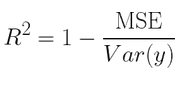

**Error absoluto medio (EAM)**: La media del valor absoluto de los errores. Pueden pensar en ello como un error promedio. Sklearn tiene una funcion mean_absolute_error() que toma los valores de y, y los valores predichos:

In [13]:
mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

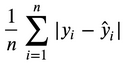

**Error cuadratico medio(ECM):** la media de los errores al cuadrado. El ECM "castiga" a los errores mas grandes, que suele ser util en el mundo real. Tengan en cuenta que para mas adelante en el curso, cuando repasemos como funcionan los algoritmos de aprendizaje automatico, el ECM es continuo y diferenciable, por lo que es mas facil de usar que EAM en la optimizacion. Sklearn tiene una funcion mean_squared_error() que toma los valor de y, y los valores predichos:

In [14]:
mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

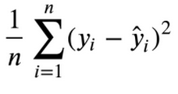

**Raiz del error cuadratico medio (RECM)**: raiz cuadratica de la media de los errores al cuadrado. Similar al ECM, pero mas popular, ya que se considera mas facil de entender que el ECM. En cuanto hayan calculado el ECM, puede toamr la raiz cuadrada de este usando np.sqrt()

In [15]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

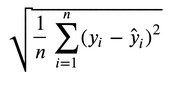